# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import date
print('modules imported')

modules imported


# Defining Download Date - only change HERE

In [2]:
download_date = '20210324'

# Complete Dataset

## Importing and Explore

Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0   Haftungsausschluss: „Die Inhalte, die über die Internetseiten des Robert Koch-Instituts zur Verfügung gestellt werden, dienen ausschließlich der allgemeinen Information der Öffentlichkeit, vorrangig der Fachöffentlichkeit“. 

In [3]:
# data has been downloaded from:
# https://npgeo-corona-npgeo-de.hub.arcgis.com/
# then choose Robert-Koch-Institut and on the next page RKI COVID 19
# this data needs to be filtered for Landkreis=Region Hannover
# and can then be downloaded
# if the data does not seem up to date the full csv-file needs to be downloaded and filtered manually
filename_all = 'RKI_COVID19_' + download_date + '.csv'
df_reg_all = pd.read_csv(filename_all)

In [4]:
print(df_reg_all.shape)

(1471042, 18)


In [5]:
print('Anzahl aller Fälle bundesweit:', df_reg_all['AnzahlFall'].sum())

Anzahl aller Fälle bundesweit: 2690210


In [6]:
print('Anzahl aller Todesfälle bundesweit:', df_reg_all['AnzahlTodesfall'].sum())

Anzahl aller Todesfälle bundesweit: 75210


## Dealing with Columns

In [7]:
print(df_reg_all.columns)

Index(['FID', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')


In [8]:
strDatenstand = df_reg_all['Datenstand'].describe(include='all').loc['top']
df_reg_all.drop(columns=['FID', 'IdBundesland', 'IdLandkreis', 'Datenstand',
                         'Bundesland', 'Refdatum', 'NeuGenesen', 
                         'AnzahlGenesen', 'NeuerTodesfall', 'NeuerFall',
                         'IstErkrankungsbeginn', 'Altersgruppe2'], 
                inplace=True)
print('Datenstand:', strDatenstand)
print('unnecessary columns dropped')

Datenstand: 24.03.2021, 00:00 Uhr
unnecessary columns dropped


# Filter for Hanover Only

In [9]:
df_reg_han = df_reg_all[df_reg_all['Landkreis']=='Region Hannover'].copy()
print('dataset loaded and filtered')
print(df_reg_han['Landkreis'].value_counts())

dataset loaded and filtered
Region Hannover    13516
Name: Landkreis, dtype: int64


# Creating and Working with Pivot Table

In [10]:
piv_reg_han = pd.pivot_table(df_reg_han, 
                             values=['AnzahlFall', 'AnzahlTodesfall'], 
                             index=['Meldedatum'], 
                             aggfunc=np.sum)
display(piv_reg_han.head(2))
display(piv_reg_han.tail(2))

AnzahlFall  AnzahlTodesfall
Meldedatum                                      
2020/03/01 00:00:00           1                0
2020/03/03 00:00:00           1                0

AnzahlFall  AnzahlTodesfall
Meldedatum                                      
2021/03/22 00:00:00          75                0
2021/03/23 00:00:00         218                0

In [11]:
piv_reg_han[['AnzahlFälle', 'AnzahlTodesfälle']] = piv_reg_han.cumsum()
piv_reg_han.reset_index(inplace=True)
piv_reg_han['Meldedatum'] = pd.to_datetime(piv_reg_han['Meldedatum'])
piv_reg_han['Jahr'] = piv_reg_han['Meldedatum'].dt.strftime('%Y')
piv_reg_han['JahrMonat'] = piv_reg_han['Meldedatum'].dt.strftime('%Y-%b')
piv_reg_han['Monat'] = piv_reg_han['Meldedatum'].dt.strftime('%b')
piv_reg_han['KaWo'] = piv_reg_han['Meldedatum'].dt.week
piv_reg_han['WoTag'] = piv_reg_han['Meldedatum'].dt.strftime('%a')
display(piv_reg_han.head(2))
display(piv_reg_han.tail(2))

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
0 2020-03-01           1                0            1                 0   
1 2020-03-03           1                0            2                 0   

   Jahr JahrMonat Monat  KaWo WoTag  
0  2020  2020-Mar   Mar     9   Sun  
1  2020  2020-Mar   Mar    10   Tue

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
375 2021-03-22          75                0        35690               868   
376 2021-03-23         218                0        35908               868   

     Jahr JahrMonat Monat  KaWo WoTag  
375  2021  2021-Mar   Mar    12   Mon  
376  2021  2021-Mar   Mar    12   Tue

## How Many Cases in Last 7 Days?

In [12]:
# will only be calculated farther down
population_han = 1157115
piv_reg_han['Diff7'] = piv_reg_han['AnzahlFälle'].diff(7)
piv_reg_han['Inzidenz'] = round(piv_reg_han['Diff7'] / population_han * 100000,1)
display(piv_reg_han.head(2))
display(piv_reg_han.tail(2))

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
0 2020-03-01           1                0            1                 0   
1 2020-03-03           1                0            2                 0   

   Jahr JahrMonat Monat  KaWo WoTag  Diff7  Inzidenz  
0  2020  2020-Mar   Mar     9   Sun    NaN       NaN  
1  2020  2020-Mar   Mar    10   Tue    NaN       NaN

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
375 2021-03-22          75                0        35690               868   
376 2021-03-23         218                0        35908               868   

     Jahr JahrMonat Monat  KaWo WoTag   Diff7  Inzidenz  
375  2021  2021-Mar   Mar    12   Mon  1424.0     123.1  
376  2021  2021-Mar   Mar    12   Tue  1465.0     126.6

In [13]:
countdays = piv_reg_han['JahrMonat'].value_counts()
medians = piv_reg_han.groupby(['JahrMonat'])['AnzahlFall'].median()
means = piv_reg_han.groupby(['JahrMonat'])['AnzahlFall'].mean().round(1)
# concat all three series into one dataframe
df_medians_means = pd.concat([countdays, medians, means], axis=1)
# name columns, set and sort indexes
df_medians_means.columns = ['Anzahl gemeldeter Tage', 'Median-/Zentralwert', 'Mittelwert']
cats = ['2020-Mar', '2020-Apr','2020-May','2020-Jun', '2020-Jul', '2020-Aug','2020-Sep', '2020-Oct',
        '2020-Nov', '2020-Dec', '2021-Jan', '2021-Feb', '2021-Mar']
df_medians_means.index = pd.CategoricalIndex(df_medians_means.index, categories=cats, ordered=True)
df_medians_means.sort_index(ascending=True, inplace=True)
display(df_medians_means)

Anzahl gemeldeter Tage  Median-/Zentralwert  Mittelwert
2020-Mar                      29                 24.0        30.9
2020-Apr                      30                 28.5        35.3
2020-May                      31                 12.0        15.0
2020-Jun                      29                  9.0        12.0
2020-Jul                      23                  4.0         5.5
2020-Aug                      31                 16.0        16.8
2020-Sep                      30                 31.0        30.4
2020-Oct                      31                 65.0        84.9
2020-Nov                      30                184.5       183.6
2020-Dec                      31                231.0       233.2
2021-Jan                      31                236.0       221.1
2021-Feb                      28                210.0       180.1
2021-Mar                      23                196.0       187.4

# Visualizing Data from Pivot Table

## Line Plot: Cases and Deaths Accumulated, All Dates

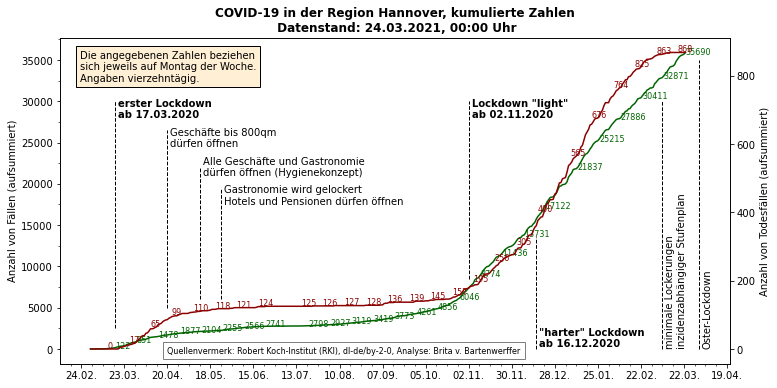

In [14]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(piv_reg_han.Meldedatum, piv_reg_han.AnzahlFälle, color='darkgreen', label='alle Fälle')
ax2 = ax1.twinx()
ax2.plot(piv_reg_han.Meldedatum, piv_reg_han.AnzahlTodesfälle, color='darkred', label='davon Todesfälle')
# properties for ax1
ax1.autoscale(enable=True, axis='x')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.'))
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0, interval=4))
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=0, interval=1))
ax1.set_xlabel('')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2500))
ax1.set_ylabel('Anzahl von Fällen (aufsummiert)')
ax1.set_title('COVID-19 in der Region Hannover, kumulierte Zahlen\n Datenstand: ' + strDatenstand, weight='bold')
# properties for ax2
ax2.set_ylabel('Anzahl von Todesfällen (aufsummiert)')
# annotations
for index, row in piv_reg_han.iterrows():
    if row['WoTag'] == 'Mon' and row['KaWo'] % 2 == 0:
        ax1.annotate(row['AnzahlFälle'], xy=(row['Meldedatum'] + timedelta(hours=24), 
                                             row['AnzahlFälle']-50),
                     fontsize=8, color='darkgreen')
        ax2.annotate(row['AnzahlTodesfälle'], xy=(row['Meldedatum'] + timedelta(days=-4), 
                                                  row['AnzahlTodesfälle']+2),
                     fontsize=8, color='darkred')
# Hinweis auf Bezug der Zahlen:
ax1.text(piv_reg_han['Meldedatum'].min() + timedelta(days=-7), 
         piv_reg_han['AnzahlFälle'].max() - 3500,
         'Die angegebenen Zahlen beziehen\nsich jeweils auf Montag der Woche.\n' \
         'Angaben vierzehntägig.', 
         bbox=dict(facecolor='PapayaWhip', alpha=1))
# Quellenvermerk:
ax1.text(date(2020,4,20), -500, 
         'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
         'Analyse: Brita v. Bartenwerffer',
         ha='left', fontsize=8, bbox=dict(facecolor='white', edgecolor='grey', alpha=1))
# Übersicht der Meilensteine
# erster Lockdown 2020
ax1.vlines(date(2020,3,17), 2500, 30000, ls='dashed', lw=1)
ax1.text(date(2020,3,17) + timedelta(days=2), 28000, 
         'erster Lockdown\nab 17.03.2020', fontweight='bold')
ax1.vlines(date(2020,4,20), 5000, 26500, ls='dashed', lw=1)
ax1.text(date(2020,4,20) + timedelta(days=2), 24500, 
         'Geschäfte bis 800qm\ndürfen öffnen')
ax1.vlines(date(2020,5,11), 6000, 22000, ls='dashed',lw=1)
ax1.text(date(2020,5,11) + timedelta(days=2), 21000, 
         'Alle Geschäfte und Gastronomie\ndürfen öffnen (Hygienekonzept)')
ax1.vlines(date(2020,5,25), 6000, 19500, ls='dashed',lw=1)
ax1.text(date(2020,5,25) + timedelta(days=2), 17500, 
         'Gastronomie wird gelockert\nHotels und Pensionen dürfen öffnen')
# zweiter Lockdown ab 02.11.2020
ax1.vlines(date(2020,11,2), 8500, 30000, ls='dashed', lw=1)
ax1.text(date(2020,11,2) + timedelta(days=2), 28000, 
         'Lockdown "light"\nab 02.11.2020', fontweight='bold')
ax1.vlines(date(2020,12,16), 0, 13500, ls='dashed', lw=1)
ax1.text(date(2020,12,16) + timedelta(days=2), 250, 
         '"harter" Lockdown\nab 16.12.2020', fontweight='bold')
ax1.vlines(date(2021,3,8), 0, 30000, ls='dashed', lw=1)
ax1.text(date(2021,3,8) + timedelta(days=2), 250, 
         'minimale Lockerungen\ninzidenzabhängiger Stufenplan',
         rotation=90)
ax1.vlines(date(2021,4,1), 0, 35000, ls='dashed', lw=1)
ax1.text(date(2021,4,1) + timedelta(days=2), 250, 
         'Oster-Lockdown',
         rotation=90)
plt.savefig('RKI_COVID19_all.png', dpi=100)
plt.show()

## Line Plot: Cases and Deaths Accumulated, Last xxx Weeks

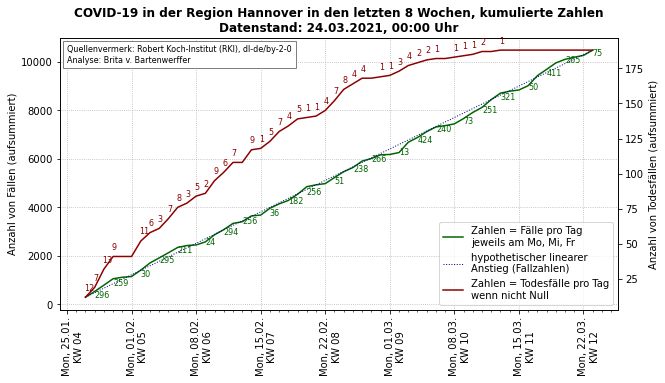

In [15]:
# calculate last xxx weeks from days; value should be dividable by 7
tagezurueck = 56
vorvierWochen = pd.to_datetime(date.today() - timedelta(tagezurueck))
piv_reg_han_subset = piv_reg_han[piv_reg_han['Meldedatum'] >= vorvierWochen].copy()
# drop and re-calculate cumsum values
piv_reg_han_subset.drop(columns=['AnzahlFälle', 'AnzahlTodesfälle'], inplace=True)
piv_reg_han_subset[['AnzahlFälle', 'AnzahlTodesfälle']] = \
                  piv_reg_han_subset[['AnzahlFall', 'AnzahlTodesfall']].cumsum()
# define and plot both plots including a sort of trendline for the infections
fig, ax5 = plt.subplots(figsize=(10,5))
# cases
ax5.plot(piv_reg_han_subset.Meldedatum, piv_reg_han_subset.AnzahlFälle, color='darkgreen', 
         label='Zahlen = Fälle pro Tag\njeweils am Mo, Mi, Fr')
df_top_bottom = piv_reg_han_subset.iloc[[0, -1]]
ax5.plot(df_top_bottom.Meldedatum, df_top_bottom.AnzahlFälle, 
         color='darkblue', linestyle='dotted', linewidth=1,
         label='hypothetischer linearer\nAnstieg (Fallzahlen)')
# deaths
ax6 = ax5.twinx()
ax6.plot(piv_reg_han_subset.Meldedatum, piv_reg_han_subset.AnzahlTodesfälle, 
         color='darkred',
         label='Zahlen = Todesfälle pro Tag\nwenn nicht Null')
# set axis, labels, title... for all cases
ax5.autoscale(enable=True, axis='x') #, tight=True)
ax5.grid(ls=':')
ax5.tick_params(axis='x', labelrotation=90)
ax5.xaxis.set_major_formatter(mdates.DateFormatter('\n%a, %d.%m.\nKW %V'))
ax5.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0))
ax5.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax5.set_ylabel('Anzahl von Fällen (aufsummiert)')
ax5.set_title('COVID-19 in der Region Hannover in den letzten ' + \
              str(round(tagezurueck/7)) + ' Wochen, kumulierte Zahlen\nDatenstand: ' + \
              strDatenstand, weight='bold')
ax6.set_ylabel('Anzahl von Todesfällen (aufsummiert)')
# get lines and labels and create one legend for both plots
lines, labels = ax5.get_legend_handles_labels()
lines2, labels2 = ax6.get_legend_handles_labels()
ax6.legend(lines + lines2, labels + labels2, loc='lower right')
# now annotate
for index, row in piv_reg_han_subset.iterrows():
    if row['WoTag'] in ['Mon', 'Wed', 'Fri']:
        ax5.annotate(row['AnzahlFall'], xy=(row['Meldedatum'] + timedelta(hours=+24), 
                                            row['AnzahlFälle']),
                     fontsize=8, color='darkgreen')
    if row['AnzahlTodesfall'] != 0:
        ax6.annotate(row['AnzahlTodesfall'], xy=(row['Meldedatum'] + timedelta(hours=-4), 
                                                 row['AnzahlTodesfälle']+5),
                    fontsize=8, color='darkred')
# name data source
ax5.text(piv_reg_han_subset['Meldedatum'].min() - timedelta(days=2), 
         piv_reg_han_subset['AnzahlFälle'].max() - 500, 
         'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0\n' \
         'Analyse: Brita v. Bartenwerffer',
         ha='left', fontsize=8, bbox=dict(facecolor='white', edgecolor='grey', alpha=1))
# save and show plot
filename = 'RKI_COVID19_last' + str(round(tagezurueck/7)) + 'weeks.png'
plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()
#display(piv_reg_han_subset.tail())

## Statistical Plots: Cases per Month, all Dates

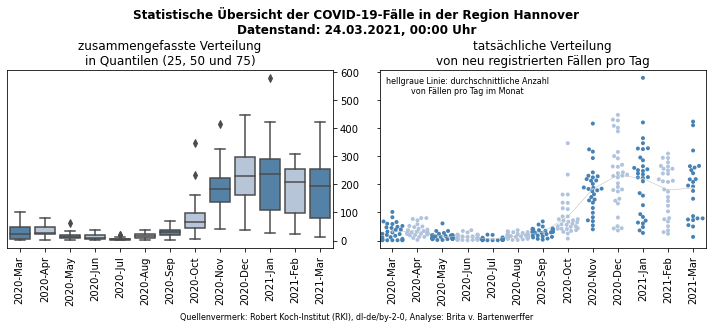

In [16]:
palette = ['steelblue', 'lightsteelblue']
fig, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.suptitle('Statistische Übersicht der COVID-19-Fälle in der Region Hannover\nDatenstand: ' + strDatenstand, weight='bold', y=1.075)
# statistical boxplot, ax3
sns.boxplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_han, ax=ax3, palette=palette)
ax3.set_title('zusammengefasste Verteilung\nin Quantilen (25, 50 und 75)')
ax3.set_xticklabels(piv_reg_han['JahrMonat'].unique(), rotation=90)
ax3.yaxis.tick_right()
ax3.set_xlabel('')
ax3.set_ylabel('')
# swarm- and pointplot of actual numbers per day, ax4
sns.swarmplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_han, ax=ax4, 
              size=4, palette=palette, zorder=1)
sns.pointplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_han, ci=None, color='silver', 
              scale=0.2)
ax4.set_title('tatsächliche Verteilung\nvon neu registrierten Fällen pro Tag')
ax4.set_xticklabels(piv_reg_han['JahrMonat'].unique(), rotation=90)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.text(3, 525, 'hellgraue Linie: durchschnittliche Anzahl\nvon Fällen pro Tag im Monat', 
         ha='center', fontsize=8)
fig.text(0.5,-0.01, 'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
         'Analyse: Brita v. Bartenwerffer', fontsize=8, ha='center')
plt.tight_layout()
plt.savefig('RKI_COVID19_stats.png', dpi=100, bbox_inches='tight')

## Interactive Faceted Bar Plot: Cases per Weekday

In [17]:
import plotly.express as px

config = {'displayModeBar': True}

fig = px.bar(x='Meldedatum', y='AnzahlFall', data_frame=piv_reg_han,
       facet_col='WoTag', facet_col_wrap=4, 
       category_orders={'WoTag': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']},
       color='AnzahlFall', color_continuous_scale='rdylgn_r')

fig.update_xaxes(title=dict(text=None), showticklabels=False)
fig.update_yaxes(title=dict(text=None), showgrid=False, 
                 nticks=10, tickfont=dict(size=8))

fig.update_layout(title={'text': 'gemeldete Fälle pro Wochentag', 
                         'y':0.98, 'x':0.1, 'xanchor': 'left'},
                  modebar=dict(bgcolor='whitesmoke'),
                  xaxis3_title=dict(text='Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
                                   'Analyse: Brita v. Bartenwerffer', 
                                   font=dict(size=8)),
                  dragmode = 'pan')

fig.update_coloraxes(colorbar=dict(thickness=25),
                     colorbar_ypad=0,
                     colorbar_title=dict(text='Fälle pro Tag',
                                         side='right'))

fig.show(config=config)
fig.write_html('RKI_COVID_19_per_weekday_plotly.html', config=config)

## Interactive Line Plot: Cases and Deaths Accumulated, All Dates

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

config = {'displayModeBar': False}

buttons = [{'label':'Alle Daten', 'step':'all'},
           {'count': 1, 'label': 'Letzte 12 Monate', 'step': 'year', 'stepmode': 'backward'},
           {'count': 6, 'label': '... 6 Monate', 'step': 'month', 'stepmode': 'backward'},
           {'count': 3, 'label': '... 3 Monate', 'step': 'month', 'stepmode': 'backward'},
           {'count': 28, 'label': '... 4 Wochen', 'step': 'day', 'stepmode': 'backward'}
          ]

# create figure with secondary y-axis
fig = make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(x=piv_reg_han['Meldedatum'], 
                         y=piv_reg_han['AnzahlFälle'],
                         mode='lines',
                         name='kumulierte Anzahl aller Fälle',
                         marker=dict(color='green',
                                     line=dict(color='white', width=1)),
                         line=dict(width=1.5),
                        ),
              secondary_y=False)

fig.add_trace(go.Scatter(x=piv_reg_han['Meldedatum'], 
                         y=piv_reg_han['AnzahlTodesfälle'],
                         mode='lines',
                         name='kumulierte Anzahl aller Todesfälle',
                         marker=dict(color='darkred',
                                     line=dict(color='white', width=1)),
                         line=dict(width=1.5),
                        ),
              secondary_y=True)

# customize x- and y-axes
fig.update_xaxes(tickangle = 90, tickfont=dict(size=8), tickformat='%d.%m.',
                 # next line forces the dates to be Mondays; plotly uses Sundays by default
                 tick0=date(2020,6,1), dtick=7*24*60*60*1000,
                 showline=True, linewidth=0.25, linecolor='black', mirror=True)
fig.update_yaxes(title_text='Anzahl aller Fälle', 
                 title_font_size=10, title_standoff = 10,
                 showgrid=False, secondary_y=False, tickfont=dict(size=8),
                 tickformat='f', ticks='outside', dtick=5000, 
                 showline=True, linewidth=0.25, linecolor='black')
fig.update_yaxes(title_text='Anzahl Todesfälle', 
                 title_font_size=10, title_standoff = 12.5,
                 showgrid=False, secondary_y=True, tickfont=dict(size=8),
                 tickformat='f', ticks='outside', dtick=100,
                 showline=True, linewidth=0.25, linecolor='black')

# customize overall layout: plot size, background, legend...
fig.update_layout(title_text='<b>COVID-19 in der Region Hannover, ' \
                             'kumulierte Zahlen</b><br>Datenstand: ' + strDatenstand,
                  title={'y':0.95, 'x':0.5, 'xanchor': 'center',
                         'font':{'size':12}},
                  autosize=False, width=700, height=375,
                  margin=dict(l=0, r=0, b=8, t=50, pad=0),
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(x=0, y=1, orientation='h', traceorder='normal',
                              font=dict(size=8)),
                  xaxis={'rangeselector': {'buttons': buttons},
                         'rangeselector_x':0.075, 'rangeselector_y':-0.225,
                         'rangeselector_font':{'size':10}},
                  dragmode = 'pan'
                 )

# credits
fig.add_annotation(x=date(2020,12,14), y=0,
                   text='Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
                        'Analyse: Brita v. Bartenwerffer', font=dict(size=8),
                   xanchor='right', yanchor='top',
                   axref = 'x', ayref='y', ax=date(2020,12,14), ay=0,
                   bordercolor='gray', borderwidth=1)

## milestones
fig.add_annotation(x=date(2020,3,17), y=750, xanchor='left', yanchor='top',
                   axref = 'x', ayref='y', ax=date(2020,3,17), ay=30000,
                   text='<b>erster Lockdown<br>ab 17.03.2020</b>', font=dict(size=9),
                   align='left', borderpad=0, showarrow=True, arrowhead=2)
fig.add_annotation(x=date(2020,4,20), y=3500, xanchor='left', yanchor='top',
                   axref = 'x', ayref='y', ax=date(2020,4,20), ay=25000,
                   text='Geschäfte bis 800qm<br>dürfen öffnen', font=dict(size=9),
                   align='left', borderpad=0, showarrow=True, arrowhead=2)
fig.add_annotation(x=date(2020,5,11), y=4500, xanchor='left', yanchor='top',
                   axref = 'x', ayref='y', ax=date(2020,5,11), ay=20000,
                   text='Alle Geschäfte und Gastronomie<br>dürfen öffnen (Hygienekonzept)',
                   font=dict(size=9), align='left', borderpad=0, showarrow=True, arrowhead=2)
fig.add_annotation(x=date(2020,5,25), y=4750, xanchor='left', yanchor='top',
                   axref = 'x', ayref='y', ax=date(2020,5,25), ay=15000,
                   text='Gastronomie wird gelockert<br>Hotels und Pensionen dürfen öffnen', 
                   font=dict(size=9), align='left', borderpad=0, showarrow=True, arrowhead=2)
fig.add_annotation(x=date(2020,11,2), y=8000, xanchor='left', yanchor='top',
                   axref = 'x', ayref='y', ax=date(2020,11,2), ay=30000,
                   text='<b>Lockdown "light"<br>ab 02.11.2020</b>', font=dict(size=9),
                   align='left', borderpad=0, showarrow=True, arrowhead=2)
fig.add_annotation(x=date(2020,12,16), y=12750, xanchor='left', yanchor='bottom',
                   axref = 'x', ayref='y', ax=date(2020,12,16),
                   text='<b>"harter" Lockdown<br>ab 16.12.2020</b>', font=dict(size=9),
                   align='left', borderpad=0, showarrow=True, arrowhead=2)
fig.add_annotation(x=date(2021,3,8), y=32500, xanchor='right', yanchor='top',
                   axref = 'x', ayref='y', ax=date(2021,3,8), ay=3500,
                   text='minimale Lockerungen<br>inzidenzabhängiger Stufenplan', 
                   textangle=90, font=dict(size=9),
                   align='left', borderpad=0, showarrow=True, arrowhead=2)

fig.show(config=config)
fig.write_html('RKI_COVID_19_cases_plotly.html', config=config)

## Interactive Statistical Plots

In [19]:
piv_reg_han['onecolour'] = 1

config = {'displayModeBar': False}

buttons = [{'label': 'statistische Verteilung<br>in Quantilen (25, 50, 75)', 'method': 'update', 
            'args': [{'type': 'box'}]},
           {'label': 'tatsächliche Verteilung<br>von Fällen pro Tag', 'method': 'update', 
            'args': [{'type': 'scatter', 'mode': 'markers'}]},
           {'label': 'Fallzahlen<br>pro Monat', 'method': 'update', 'args': [{'type': 'bar'}]},
           {'label': 'Meldetage<br>pro Monat', 'method': 'update', 'args': [{'type': 'histogram'}]}]

fig = px.box(x='JahrMonat', y='AnzahlFall', data_frame=piv_reg_han,
             color='onecolour', color_discrete_sequence=['steelblue'],
             labels={'JahrMonat':'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
                     'Analyse: Brita v. Bartenwerffer', 'AnzahlFall':'Anzahl gemeldeter Fälle'},
             title='<b>Statistische Übersicht der COVID-19-Fälle in der Region Hannover</b><br>Datenstand: ' + strDatenstand)

fig.update_xaxes(tickangle = 90, tickfont=dict(size=10), title_font_size=8,
                 showline=True, linewidth=0.25, linecolor='black')
fig.update_yaxes(tickfont=dict(size=10), title_font_size=10,
                 showline=True, linewidth=0.25, linecolor='black')

fig.update_layout(title={'y':0.95, 'x':0.5, 'xanchor': 'center',
                         'font':{'size':12}},
                  autosize=False, width=600, height=350,
                  margin=dict(l=0, r=0, b=8, t=90, pad=0),
                  plot_bgcolor='rgba(0,0,0,0)',
                  showlegend=False)

fig.update_layout({'updatemenus': [{'type':'buttons','direction': 'left',
                                    'x': 0.5,'y': 1.2, 'xanchor' : 'center',
                                    'showactive': True, 'active': 0,
                                    'buttons': buttons}]})

fig.show(config=config)
fig.write_html('RKI_COVID_19_statistics_plotly.html', config=config)

## Grouped Bar Plots: Cases and Deaths per Age Group

In [20]:
piv_reg_age = pd.pivot_table(df_reg_han, 
                             values=['AnzahlFall', 'AnzahlTodesfall'], 
                             index=['Meldedatum', 'Altersgruppe'], 
                             aggfunc=np.sum)
piv_reg_age[['AnzahlFälle', 'AnzahlTodesfälle']] = piv_reg_age.cumsum()
piv_reg_age.reset_index(inplace=True)
piv_reg_age['Meldedatum'] = pd.to_datetime(piv_reg_age['Meldedatum'])
#piv_reg_age['KaWo'] = piv_reg_age['Meldedatum'].dt.isocalendar().week
piv_reg_age['Jahr'] = piv_reg_age['Meldedatum'].dt.strftime('%Y')
piv_reg_age['JahrMonat'] = piv_reg_age['Meldedatum'].dt.strftime('%Y-%b')
piv_reg_age['Monat'] = piv_reg_age['Meldedatum'].dt.strftime('%b')
piv_reg_age['KaWo'] = piv_reg_age['Meldedatum'].dt.week
piv_reg_age['WoTag'] = piv_reg_age['Meldedatum'].dt.strftime('%a')
piv_reg_age.sort_values(['Altersgruppe', 'Meldedatum'], inplace=True)
display(piv_reg_age.head(2))
display(piv_reg_age.tail(2))

Meldedatum Altersgruppe  AnzahlFall  AnzahlTodesfall  AnzahlFälle  \
61 2020-03-24      A00-A04           1                0          392   
72 2020-03-26      A00-A04           1                0          562   

    AnzahlTodesfälle  Jahr JahrMonat Monat  KaWo WoTag  
61                 8  2020  2020-Mar   Mar    13   Tue  
72                11  2020  2020-Mar   Mar    13   Thu

Meldedatum Altersgruppe  AnzahlFall  AnzahlTodesfall  AnzahlFälle  \
1714 2021-03-12    unbekannt           1                0        33871   
1738 2021-03-16    unbekannt           1                0        34443   

      AnzahlTodesfälle  Jahr JahrMonat Monat  KaWo WoTag  
1714               867  2021  2021-Mar   Mar    10   Fri  
1738               868  2021  2021-Mar   Mar    11   Tue

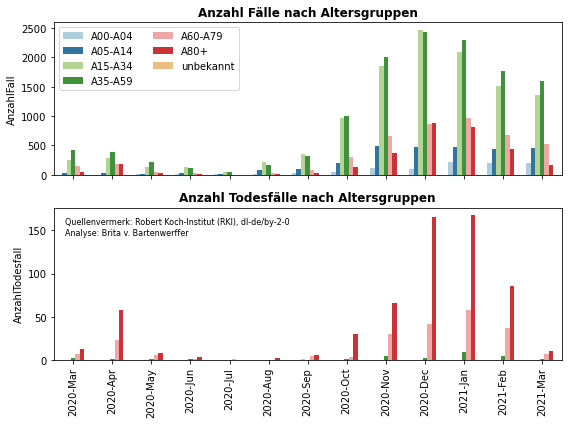

In [21]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), sharex=True)

# age related
sns.barplot(x='JahrMonat', y='AnzahlFall', hue='Altersgruppe', data=piv_reg_age,
            palette='Paired', ci=None, estimator=sum, ax=ax1)
ax1.legend(loc='upper left', ncol=2)
ax1.set_xlabel('')
ax1.set_title('Anzahl Fälle nach Altersgruppen', weight='bold')

# age and deaths
sns.barplot(x='JahrMonat', y='AnzahlTodesfall', hue='Altersgruppe', data=piv_reg_age,
            palette='Paired', ci=None, estimator=sum, ax=ax2)
ax2.get_legend().remove()
ax2.set_xlabel('')
ax2.set_xticklabels(piv_reg_age['JahrMonat'].unique(), rotation=90)
ax2.text(-0.2,145, 'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0\n' \
         'Analyse: Brita v. Bartenwerffer', fontsize=8, ha='left')
ax2.set_title('Anzahl Todesfälle nach Altersgruppen', weight='bold')
plt.tight_layout()
plt.savefig('RKI_COVID19_agegroups.png', dpi=100, bbox_inches='tight');

## Grouped Bar Plots: Cases and Deaths per Gender

In [22]:
piv_reg_mf = pd.pivot_table(df_reg_han, 
                             values=['AnzahlFall', 'AnzahlTodesfall'], 
                             index=['Meldedatum', 'Geschlecht'], 
                             aggfunc=np.sum)
piv_reg_mf[['AnzahlFälle', 'AnzahlTodesfälle']] = piv_reg_mf.cumsum()
piv_reg_mf.reset_index(inplace=True)
piv_reg_mf['Meldedatum'] = pd.to_datetime(piv_reg_mf['Meldedatum'])
piv_reg_mf['Jahr'] = piv_reg_mf['Meldedatum'].dt.strftime('%Y')
piv_reg_mf['JahrMonat'] = piv_reg_mf['Meldedatum'].dt.strftime('%Y-%b')
piv_reg_mf['Monat'] = piv_reg_mf['Meldedatum'].dt.strftime('%b')
piv_reg_mf['KaWo'] = piv_reg_mf['Meldedatum'].dt.week
piv_reg_mf['WoTag'] = piv_reg_mf['Meldedatum'].dt.strftime('%a')
piv_reg_mf.sort_values(['Geschlecht', 'Meldedatum'], inplace=True)
display(piv_reg_mf.head(2))
display(piv_reg_mf.tail(2))

Meldedatum Geschlecht  AnzahlFall  AnzahlTodesfall  AnzahlFälle  \
0 2020-03-01          M           1                0            1   
1 2020-03-03          M           1                0            2   

   AnzahlTodesfälle  Jahr JahrMonat Monat  KaWo WoTag  
0                 0  2020  2020-Mar   Mar     9   Sun  
1                 0  2020  2020-Mar   Mar    10   Tue

Meldedatum Geschlecht  AnzahlFall  AnzahlTodesfall  AnzahlFälle  \
937 2021-03-22  unbekannt           3                0        35690   
940 2021-03-23  unbekannt           5                0        35908   

     AnzahlTodesfälle  Jahr JahrMonat Monat  KaWo WoTag  
937               868  2021  2021-Mar   Mar    12   Mon  
940               868  2021  2021-Mar   Mar    12   Tue

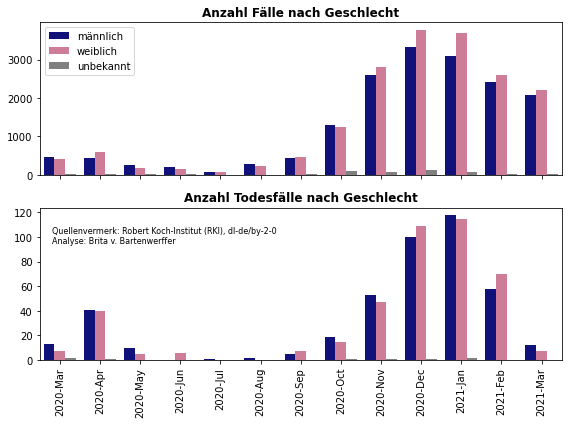

In [23]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), sharex=True)

palette = ['darkblue', 'palevioletred', 'gray']
# gender related
sns.barplot(x='JahrMonat', y='AnzahlFall', hue='Geschlecht', data=piv_reg_mf,
            palette=palette, ci=None, estimator=sum, ax=ax1)
ax1.legend(labels=['männlich', 'weiblich', 'unbekannt'], loc='upper left')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Anzahl Fälle nach Geschlecht', weight='bold')

# gender and deaths
sns.barplot(x='JahrMonat', y='AnzahlTodesfall', hue='Geschlecht', data=piv_reg_mf,
            palette=palette, ci=None, estimator=sum)
ax2.set_xticklabels(piv_reg_mf['JahrMonat'].unique(), rotation=90)
ax2.get_legend().remove()
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.text(-0.2,95, 'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0\n' \
         'Analyse: Brita v. Bartenwerffer', fontsize=8, ha='left')
ax2.set_title('Anzahl Todesfälle nach Geschlecht', weight='bold')
plt.tight_layout()
plt.savefig('RKI_COVID19_gender.png', dpi=100, bbox_inches='tight');

# Weekly Case Numbers
## Mondays only and add columns for difference

In [24]:
piv_reg_mon = piv_reg_han[piv_reg_han['WoTag'] == 'Mon'].copy()
#piv_reg_mon['proWoche'] = piv_reg_mon['AnzahlFälle'].shift(-1) - piv_reg_mon['AnzahlFälle']
piv_reg_mon['DiffVorwocheF'] = piv_reg_mon['AnzahlFälle'].diff()
piv_reg_mon['DiffVorwocheT'] = piv_reg_mon['AnzahlTodesfälle'].diff()
piv_reg_mon.tail()

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
347 2021-02-22          51                4        30411               825   
354 2021-03-01          13                1        31611               850   
361 2021-03-08          73                1        32871               863   
368 2021-03-15          50                0        34266               868   
375 2021-03-22          75                0        35690               868   

     Jahr JahrMonat Monat  KaWo WoTag   Diff7  Inzidenz  onecolour  \
347  2021  2021-Feb   Feb     8   Mon  1295.0     111.9          1   
354  2021  2021-Mar   Mar     9   Mon  1200.0     103.7          1   
361  2021  2021-Mar   Mar    10   Mon  1260.0     108.9          1   
368  2021  2021-Mar   Mar    11   Mon  1395.0     120.6          1   
375  2021  2021-Mar   Mar    12   Mon  1424.0     123.1          1   

     DiffVorwocheF  DiffVorwocheT  
347         1295.0           27.0  
354         1200.0           25.0  
361         1260.0           13.0  
368         1395.0            5.0  
375         1424.0            0.0

## Line Plot: Case and Death Difference

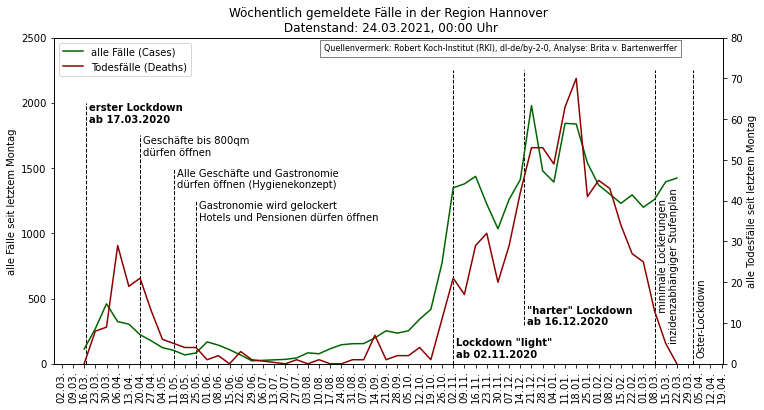

In [25]:
fig, ax1=plt.subplots(figsize=(12,6))
sns.lineplot(x='Meldedatum', y='DiffVorwocheF', data=piv_reg_mon, ax=ax1,
             color='darkgreen', label='alle Fälle (Cases)')
#ax1.grid(ls=':')
ax1.get_legend().remove()
ax1.text(piv_reg_mon['Meldedatum'].max(), 2400, 
         'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
         'Analyse: Brita v. Bartenwerffer',
         ha='right', fontsize=8, bbox=dict(facecolor='white', edgecolor='grey', alpha=1))
ax2=ax1.twinx()
sns.lineplot(x='Meldedatum', y='DiffVorwocheT', data=piv_reg_mon, ax=ax2,
             color='darkred', label='Todesfälle (Deaths)')
ax1.tick_params(axis='x', labelrotation=90)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.'))
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0))
#ax2.xaxis.set_minor_locator(mdates.DayLocator(interval=4))
ax1.set(title='Wöchentlich gemeldete Fälle in der Region Hannover\n Datenstand: ' + strDatenstand,
        xlabel='',
        ylim=(0,2500),
        ylabel='alle Fälle seit letztem Montag')
ax2.set(ylim=(0,80),
        ylabel='alle Todesfälle seit letztem Montag')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
# Übersicht der Meilensteine
# Lockdown und Lockerungen Frühjahr 2020
ax1.vlines(date(2020,3,17), 0, 2000, ls='dashed', lw=1)
ax1.text(date(2020,3,17) + timedelta(days=2), 1850, 
         'erster Lockdown\nab 17.03.2020', fontweight='bold')
ax1.vlines(date(2020,4,20), 0, 1750, ls='dashed', lw=1)
ax1.text(date(2020,4,20) + timedelta(days=2), 1600, 
         'Geschäfte bis 800qm\ndürfen öffnen')
ax1.vlines(date(2020,5,11), 0, 1500, ls='dashed',lw=1)
ax1.text(date(2020,5,11) + timedelta(days=2), 1350, 
         'Alle Geschäfte und Gastronomie\ndürfen öffnen (Hygienekonzept)')
ax1.vlines(date(2020,5,25), 0, 1250, ls='dashed',lw=1)
ax1.text(date(2020,5,25) + timedelta(days=2), 1100, 
         'Gastronomie wird gelockert\nHotels und Pensionen dürfen öffnen')
# Lockdowns ab November 2021
ax1.vlines(date(2020,11,2), 0, 2250, ls='dashed', lw=1)
ax1.text(date(2020,11,2) + timedelta(days=2), 50, 
         'Lockdown "light"\nab 02.11.2020', fontweight='bold')
ax1.vlines(date(2020,12,16), 300, 2250, ls='dashed', lw=1)
ax1.text(date(2020,12,16) + timedelta(days=2), 300, 
         '"harter" Lockdown\nab 16.12.2020', fontweight='bold')
ax1.vlines(date(2021,3,8), 0, 2250, ls='dashed', lw=1)
ax1.text(date(2021,3,8) + timedelta(days=2), 1350, 
         '          minimale Lockerungen\ninzidenzabhängiger Stufenplan',
         rotation=90, va='top')
ax1.vlines(date(2021,4,1), 0, 2250, ls='dashed', lw=1)
ax1.text(date(2021,4,1) + timedelta(days=2), 50, 
         'Oster-Lockdown', rotation=90, va='bottom')
plt.savefig('RKI_COVID19_weekly.png', dpi=100);

# Cases per 100,000 Inhabitants
## Import and Clean Dataset

In [26]:
filename_lk = 'RKI_COVID19_Landkreise_' + download_date + '.csv'
inzidenz = pd.read_csv(filename_lk)
inzidenz['cases7_per_100k_float'] = inzidenz['cases7_per_100k_txt'].str.replace(',', '.').astype(float)
display(inzidenz.head(2))

OBJECTID  ADE   GF  BSG    RS     AGS        SDV_RS        GEN  \
0         1  4.0  4.0  1.0  1001  1001.0  1.001000e+10  Flensburg   
1         2  4.0  4.0  1.0  1002  1002.0  1.002000e+10       Kiel   

                BEZ   IBZ  ... cases7_bl_per_100k cases7_bl  death7_bl  \
0  Kreisfreie Stadt  40.0  ...          58.406769      1696          1   
1  Kreisfreie Stadt  40.0  ...          58.406769      1696          1   

   cases7_lk  death7_lk  cases7_per_100k_txt  AdmUnitId  SHAPE_Length  \
0         84          0                 93,2       1001      0.524721   
1        130          1                 52,7       1002      1.274684   

  SHAPE_Area cases7_per_100k_float  
0   0.006873                  93.2  
1   0.015507                  52.7  

[2 rows x 48 columns]

### Get Population Size for Later Use

In [27]:
print('Einträge in der Tabelle:', inzidenz.shape[0])
print('Anzahl der Einträge zur Einwohnerzahl:', inzidenz['EWZ'].nunique())
print('Anzahl der Einträge zur Einwohnerzahl pro Bundesland:', inzidenz['EWZ_BL'].nunique())
print(inzidenz['EWZ'].unique().sum())
print(inzidenz['EWZ_BL'].unique().sum())
display(inzidenz[inzidenz['GEN'] == 'Region Hannover'][['EWZ', 'EWZ_BL']])
population_all = inzidenz['EWZ'].unique().sum()

Einträge in der Tabelle: 412
Anzahl der Einträge zur Einwohnerzahl: 412
Anzahl der Einträge zur Einwohnerzahl pro Bundesland: 16
83166711
83166711


EWZ   EWZ_BL
26  1157115  7993608

## Interactive Stacked Histogram

In [28]:
Inzidenz_Datenstand = inzidenz[inzidenz['GEN'] == 'Region Hannover']['last_update'].values[0]

config = {'displayModeBar': True}

fig = px.histogram(data_frame=inzidenz, x='cases7_per_100k_float',
             color='BL', color_discrete_sequence=px.colors.qualitative.Alphabet,
             marginal='rug', hover_name='GEN')

fig.update_xaxes(showline=True, linewidth=0.25, linecolor='grey', mirror=True,
                 autorange=True, fixedrange=False)
fig.update_yaxes(title='', 
                 showline=True, linewidth=0.25, linecolor='grey', mirror=True,
                 autorange=True, fixedrange=False)

fig.update_layout(margin=dict(r=0, l=0, b=0, t=50, pad=0),
                  title_text='<b>tagesaktuelle 7-Tages-Inzidenzwerte</b><br>Datenstand: ' + Inzidenz_Datenstand,
                  title={'y':0.95, 'x':0.4, 'xanchor': 'center', 'font':{'size':12}},
                  xaxis={'title':'Fälle per 100.000 Einwohnern'},
                  legend_title='')

# credits
fig.add_annotation(x=175, y=-1,
                   text='Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
                        'Analyse: Brita v. Bartenwerffer', font=dict(size=8),
                   xanchor='center', yanchor='top',
                   axref = 'x', ayref='y', ax=175, ay=-1,
                   bordercolor='gray', borderwidth=1)

# note
fig.add_annotation(x=550, y=80,
                   text='in der Legend auf den Namen des Bundeslandes<br>doppelklicken, ' \
                        'um nur dessen Werte anzuzeigen', font=dict(size=8, color='red'),
                   xanchor='right', yanchor='top',
                   axref = 'x', ayref='y', ax=550, ay=80,
                   bordercolor='gray', borderwidth=0)

fig.show(config=config)
fig.write_html('RKI_COVID_19_per100k_plotly.html', config=config)

# Case Numbers Across Germany
## Create Pivot Table per "Meldedatum"

In [29]:
piv_reg_all = pd.pivot_table(df_reg_all, 
                             values=['AnzahlFall', 'AnzahlTodesfall'], 
                             index=['Meldedatum'], 
                             aggfunc=np.sum)
display(piv_reg_all.head(2))
display(piv_reg_all.tail(2))

AnzahlFall  AnzahlTodesfall
Meldedatum                                      
2020/01/07 00:00:00           1                0
2020/01/19 00:00:00           1                0

AnzahlFall  AnzahlTodesfall
Meldedatum                                      
2021/03/22 00:00:00        7790                9
2021/03/23 00:00:00       12603                8

In [30]:
piv_reg_all[['AnzahlFälle', 'AnzahlTodesfälle']] = piv_reg_all.cumsum()
piv_reg_all.reset_index(inplace=True)
piv_reg_all['Meldedatum'] = pd.to_datetime(piv_reg_all['Meldedatum'])
piv_reg_all = piv_reg_all[piv_reg_all['Meldedatum'] >= pd.to_datetime(date(2020,3,1))]
piv_reg_all['Jahr'] = piv_reg_all['Meldedatum'].dt.strftime('%Y')
piv_reg_all['JahrMonat'] = piv_reg_all['Meldedatum'].dt.strftime('%Y-%b')
piv_reg_all['Monat'] = piv_reg_all['Meldedatum'].dt.strftime('%b')
piv_reg_all['KaWo'] = piv_reg_all['Meldedatum'].dt.week
piv_reg_all['WoTag'] = piv_reg_all['Meldedatum'].dt.strftime('%a')
display(piv_reg_all.head(2))
display(piv_reg_all.tail(2))

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
22 2020-03-01          36                0          170                 1   
23 2020-03-02          40                0          210                 1   

    Jahr JahrMonat Monat  KaWo WoTag  
22  2020  2020-Mar   Mar     9   Sun  
23  2020  2020-Mar   Mar    10   Mon

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
408 2021-03-22        7790                9      2677607             75202   
409 2021-03-23       12603                8      2690210             75210   

     Jahr JahrMonat Monat  KaWo WoTag  
408  2021  2021-Mar   Mar    12   Mon  
409  2021  2021-Mar   Mar    12   Tue

In [31]:
# how many cases were there in the last 7 days?
piv_reg_all['Diff7'] = piv_reg_all['AnzahlFälle'].diff(7)
print(population_all)
piv_reg_all['Inzidenz'] = round(piv_reg_all['Diff7'] / population_all * 100000,1)
display(piv_reg_all.head(2))
display(piv_reg_all.tail(2))

83166711


Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
22 2020-03-01          36                0          170                 1   
23 2020-03-02          40                0          210                 1   

    Jahr JahrMonat Monat  KaWo WoTag  Diff7  Inzidenz  
22  2020  2020-Mar   Mar     9   Sun    NaN       NaN  
23  2020  2020-Mar   Mar    10   Mon    NaN       NaN

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
408 2021-03-22        7790                9      2677607             75202   
409 2021-03-23       12603                8      2690210             75210   

     Jahr JahrMonat Monat  KaWo WoTag    Diff7  Inzidenz  
408  2021  2021-Mar   Mar    12   Mon  92901.0     111.7  
409  2021  2021-Mar   Mar    12   Tue  89760.0     107.9

## Line Plot: Cumulated Case Numbers Across Germany

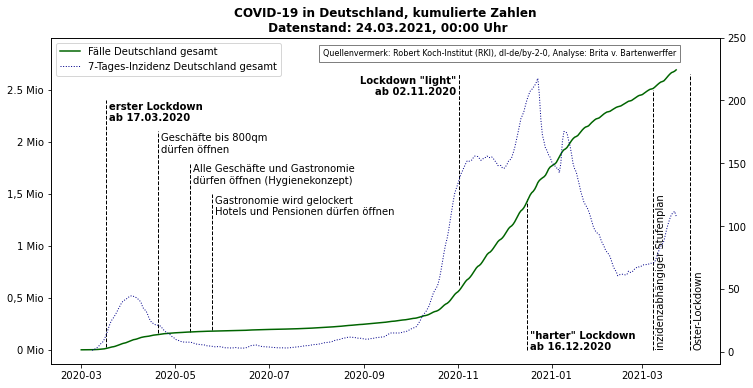

In [32]:
fig, ax1 = plt.subplots(1, figsize=(12,6))
ax1.plot(piv_reg_all['Meldedatum'], piv_reg_all['AnzahlFälle'], color='darkgreen', 
         label='Fälle Deutschland gesamt')
# ax1.plot([piv_reg_all['Meldedatum'].min(), piv_reg_all['Meldedatum'].max()],
#          [piv_reg_all['AnzahlFälle'].min(), piv_reg_all['AnzahlFälle'].max()],
#          color='steelblue', ls=':', lw=1,
#          label='hypothetischer linearer Anstieg')
ax2 = ax1.twinx()
ax2.plot(piv_reg_all['Meldedatum'], piv_reg_all['Inzidenz'], color='darkblue', 
         ls=':', lw=1, label='7-Tages-Inzidenz Deutschland gesamt')
ylims = ax1.get_ylim()
ax1.set_ylim(ylims[0], 3000000)
ax1.set_yticks(np.arange(0, 3000000, 500000))
ax1.set_yticklabels(['0 Mio', '0,5 Mio', '1 Mio', '1,5 Mio', '2 Mio', '2.5 Mio',
                     '3 Mio'])
# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
ylims2 = ax2.get_ylim()
ax2.set_ylim(ylims2[0], 250)
# Quellenvermerk
ax1.text(piv_reg_all['Meldedatum'].max(), 2825000, 
         'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
         'Analyse: Brita v. Bartenwerffer',
         ha='right', fontsize=8, bbox=dict(facecolor='white', edgecolor='grey', alpha=1))
# Übersicht der Meilensteine
# Lockdown und Lockerungen Frühjahr 2020
ax1.vlines(date(2020,3,17), 25000, 2400000, ls='dashed', lw=1)
ax1.text(date(2020,3,17) + timedelta(days=2), 2200000, 
         'erster Lockdown\nab 17.03.2020', fontweight='bold')
ax1.vlines(date(2020,4,20), 160000, 2100000, ls='dashed', lw=1)
ax1.text(date(2020,4,20) + timedelta(days=2), 1900000, 
         'Geschäfte bis 800qm\ndürfen öffnen')
ax1.vlines(date(2020,5,11), 175000, 1800000, ls='dashed',lw=1)
ax1.text(date(2020,5,11) + timedelta(days=2), 1600000, 
         'Alle Geschäfte und Gastronomie\ndürfen öffnen (Hygienekonzept)')
ax1.vlines(date(2020,5,25), 190000, 1500000, ls='dashed',lw=1)
ax1.text(date(2020,5,25) + timedelta(days=2), 1300000, 
         'Gastronomie wird gelockert\nHotels und Pensionen dürfen öffnen')
# Lockdowns ab November 2021
ax1.vlines(date(2020,11,2), 625000, 2650000, ls='dashed', lw=1)
ax1.text(date(2020,11,2) + timedelta(days=-2), 2450000, 
         'Lockdown "light"\nab 02.11.2020', fontweight='bold', ha='right')
ax1.vlines(date(2020,12,16), 0, 1450000, ls='dashed', lw=1)
ax1.text(date(2020,12,16) + timedelta(days=2), 0, 
         '"harter" Lockdown\nab 16.12.2020', fontweight='bold')
ax1.vlines(date(2021,3,8), 0, 2500000, ls='dashed', lw=1)
ax1.text(date(2021,3,8) + timedelta(days=2), 0, 
         'inzidenzabhängiger Stufenplan',
         rotation=90, va='bottom')
ax1.vlines(date(2021,4,1), 0, 2650000, ls='dashed', lw=1)
ax1.text(date(2021,4,1) + timedelta(days=2), 0, 
         'Oster-Lockdown',
         rotation=90, va='bottom')
# Set title and save
ax1.set_title('COVID-19 in Deutschland, kumulierte Zahlen\n Datenstand: ' + strDatenstand, weight='bold')
plt.savefig('RKI_COVID19_GER_reg_all.png', dpi=100);

## Statistical Plots

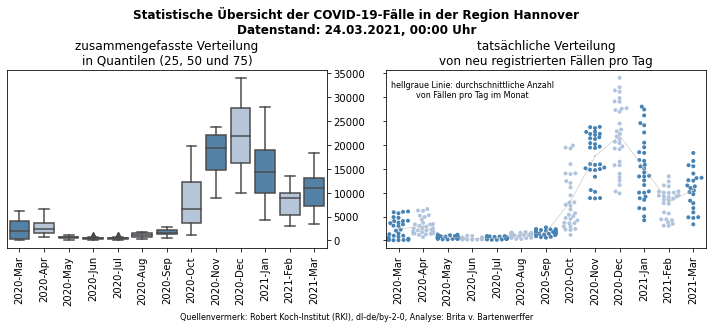

In [33]:
palette = ['steelblue', 'lightsteelblue']
fig, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.suptitle('Statistische Übersicht der COVID-19-Fälle in der Region Hannover\nDatenstand: ' + strDatenstand, weight='bold', y=1.075)
# statistical boxplot, ax3
sns.boxplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_all, ax=ax3, palette=palette)
ax3.set_title('zusammengefasste Verteilung\nin Quantilen (25, 50 und 75)')
ax3.set_xticklabels(piv_reg_all['JahrMonat'].unique(), rotation=90)
ax3.yaxis.tick_right()
ax3.set_xlabel('')
ax3.set_ylabel('')
# swarm- and pointplot of actual numbers per day, ax4
sns.swarmplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_all, ax=ax4, 
              size=4, palette=palette, zorder=1)
sns.pointplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_all, ci=None, color='silver', 
              scale=0.2)
ax4.set_title('tatsächliche Verteilung\nvon neu registrierten Fällen pro Tag')
ax4.set_xticklabels(piv_reg_all['JahrMonat'].unique(), rotation=90)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.text(3, 30000, 'hellgraue Linie: durchschnittliche Anzahl\nvon Fällen pro Tag im Monat', 
         ha='center', fontsize=8)
fig.text(0.5,-0.01, 'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
         'Analyse: Brita v. Bartenwerffer', fontsize=8, ha='center')
plt.tight_layout()
plt.savefig('RKI_COVID19_GER_stats.png', dpi=100, bbox_inches='tight')

## Line Plot: Germany vs. Hanover All Times

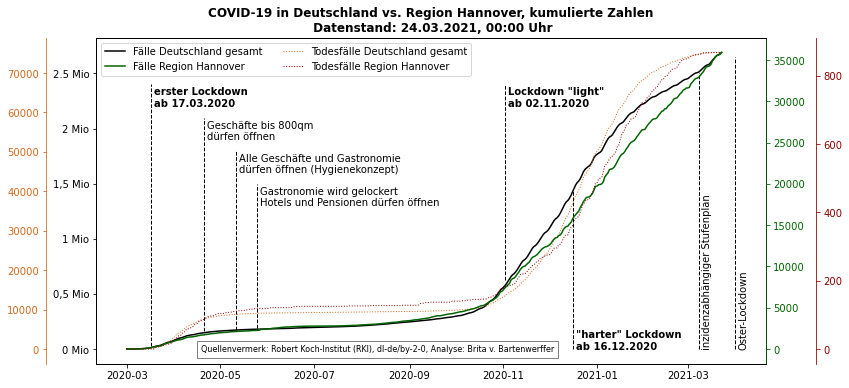

In [34]:
fig, ax1 = plt.subplots(figsize=(12,6))
# left y-axis: Germany Cases
ax1.plot(piv_reg_all['Meldedatum'], piv_reg_all.AnzahlFälle, color='black', 
         label='Fälle Deutschland gesamt')
ax1.set_yticks(np.arange(0, 3000000, 500000))
ax1.set_yticklabels(['0 Mio', '0,5 Mio', '1 Mio', '1,5 Mio', '2 Mio', '2.5 Mio',
                     '3 Mio'])
# left x-axis: Germany Deaths
ax4 = ax1.twinx()
ax4.plot(piv_reg_all['Meldedatum'], piv_reg_all.AnzahlTodesfälle, color='chocolate', 
         ls=':', lw=1, label='Todesfälle Deutschland gesamt')
ax4.spines['left'].set_position(('axes', -0.075))
ax4.spines['left'].set_visible(True)
ax4.yaxis.set_label_position('left')
ax4.yaxis.set_ticks_position('left')
ax4.set_ylabel('')
# right y_axis: Hanover Cases
ax2 = ax1.twinx()
ax2.plot(piv_reg_han.Meldedatum, piv_reg_han.AnzahlFälle, color='darkgreen', 
         label='Fälle Region Hannover')
ax2.set_ylabel('')
# right y_axis: Hanover Deaths
ax3 = ax1.twinx()
ax3.plot(piv_reg_han.Meldedatum, piv_reg_han.AnzahlTodesfälle, color='darkred', 
         ls=':', lw=1, label='Todesfälle Region Hannover')
ax3.spines['right'].set_position(('axes', 1.075))
ax3.set_ylabel('')
# color secondary y_axes
ax2.yaxis.label.set_color('darkgreen')
ax2.tick_params(axis='y', colors='darkgreen')
ax2.spines['right'].set_edgecolor('darkgreen')
ax3.yaxis.label.set_color('darkred')
ax3.tick_params(axis='y', colors='darkred')
ax3.spines['right'].set_edgecolor('darkred')
ax4.yaxis.label.set_color('chocolate')
ax4.tick_params(axis='y', colors='chocolate')
ax4.spines['left'].set_edgecolor('chocolate')
# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines4 + lines3, 
           labels + labels2 + labels4 + labels3, loc='upper left', ncol=2)
# Quellenvermerk
ax1.text(date(2020,4,18), -25000, 
         'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
         'Analyse: Brita v. Bartenwerffer',
         ha='left', fontsize=8, bbox=dict(facecolor='white', edgecolor='grey', alpha=1))
# Übersicht der Meilensteine
# Lockdown und Lockerungen Frühjahr 2020
ax1.vlines(date(2020,3,17), 25000, 2400000, ls='dashed', lw=1)
ax1.text(date(2020,3,17) + timedelta(days=2), 2200000, 
         'erster Lockdown\nab 17.03.2020', fontweight='bold')
ax1.vlines(date(2020,4,20), 160000, 2100000, ls='dashed', lw=1)
ax1.text(date(2020,4,20) + timedelta(days=2), 1900000, 
         'Geschäfte bis 800qm\ndürfen öffnen')
ax1.vlines(date(2020,5,11), 175000, 1800000, ls='dashed',lw=1)
ax1.text(date(2020,5,11) + timedelta(days=2), 1600000, 
         'Alle Geschäfte und Gastronomie\ndürfen öffnen (Hygienekonzept)')
ax1.vlines(date(2020,5,25), 190000, 1500000, ls='dashed',lw=1)
ax1.text(date(2020,5,25) + timedelta(days=2), 1300000, 
         'Gastronomie wird gelockert\nHotels und Pensionen dürfen öffnen')
# Lockdowns ab November 2021
ax1.vlines(date(2020,11,2), 625000, 2400000, ls='dashed', lw=1)
ax1.text(date(2020,11,2) + timedelta(days=2), 2200000, 
         'Lockdown "light"\nab 02.11.2020', fontweight='bold')
ax1.vlines(date(2020,12,16), 0, 1450000, ls='dashed', lw=1)
ax1.text(date(2020,12,16) + timedelta(days=2), 0, 
         '"harter" Lockdown\nab 16.12.2020', fontweight='bold')
ax1.vlines(date(2021,3,8), 0, 2500000, ls='dashed', lw=1)
ax1.text(date(2021,3,8) + timedelta(days=2), 0, 
         'inzidenzabhängiger Stufenplan',
         rotation=90, va='bottom')
ax1.vlines(date(2021,4,1), 0, 2650000, ls='dashed', lw=1)
ax1.text(date(2021,4,1) + timedelta(days=2), 0, 
         'Oster-Lockdown',
         rotation=90, va='bottom')
ax1.set_title('COVID-19 in Deutschland vs. Region Hannover, kumulierte Zahlen\n Datenstand: ' + strDatenstand, weight='bold')
plt.savefig('RKI_COVID19_GER_vs_HAJ_all.png', dpi=100);

## Line Plot: Germany vs. Hannover from 2nd November

In [35]:
piv_reg_all_last = piv_reg_all[piv_reg_all['Meldedatum'] >= pd.to_datetime(date(2020,11,2))]
piv_reg_han_last = piv_reg_han[piv_reg_han['Meldedatum'] >= pd.to_datetime(date(2020,11,2))]
display(piv_reg_all_last.tail())
display(piv_reg_han_last.tail())

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
405 2021-03-19       15525               18      2650915             75182   
406 2021-03-20       13042                6      2663957             75188   
407 2021-03-21        5860                5      2669817             75193   
408 2021-03-22        7790                9      2677607             75202   
409 2021-03-23       12603                8      2690210             75210   

     Jahr JahrMonat Monat  KaWo WoTag    Diff7  Inzidenz  
405  2021  2021-Mar   Mar    11   Fri  88300.0     106.2  
406  2021  2021-Mar   Mar    11   Sat  90884.0     109.3  
407  2021  2021-Mar   Mar    11   Sun  91876.0     110.5  
408  2021  2021-Mar   Mar    12   Mon  92901.0     111.7  
409  2021  2021-Mar   Mar    12   Tue  89760.0     107.9

Meldedatum  AnzahlFall  AnzahlTodesfall  AnzahlFälle  AnzahlTodesfälle  \
372 2021-03-19         265                0        35379               868   
373 2021-03-20         149                0        35528               868   
374 2021-03-21          87                0        35615               868   
375 2021-03-22          75                0        35690               868   
376 2021-03-23         218                0        35908               868   

     Jahr JahrMonat Monat  KaWo WoTag   Diff7  Inzidenz  onecolour  
372  2021  2021-Mar   Mar    11   Fri  1508.0     130.3          1  
373  2021  2021-Mar   Mar    11   Sat  1391.0     120.2          1  
374  2021  2021-Mar   Mar    11   Sun  1399.0     120.9          1  
375  2021  2021-Mar   Mar    12   Mon  1424.0     123.1          1  
376  2021  2021-Mar   Mar    12   Tue  1465.0     126.6          1

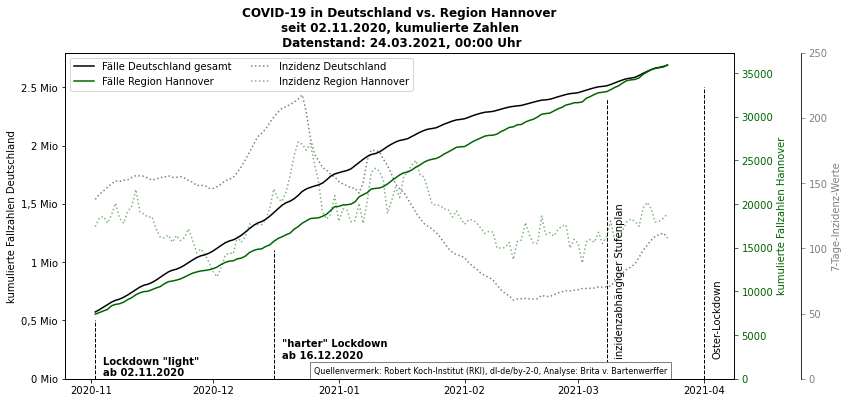

In [36]:
fig, ax1 = plt.subplots(figsize=(12,6))
# left y-axis: Germany
ax1.plot(piv_reg_all_last['Meldedatum'], piv_reg_all_last['AnzahlFälle'], color='black', 
         label='Fälle Deutschland gesamt')
# use same scale as for all times
ylims = ax1.get_ylim()
ax1.set_ylim(0, ylims[1])
ax1.set_yticks(np.arange(0, 3000000, 500000))
ax1.set_yticklabels(['0 Mio', '0,5 Mio', '1 Mio', '1,5 Mio', '2 Mio', '2.5 Mio',
                     '3 Mio'])
ax1.set_ylabel('kumulierte Fallzahlen Deutschland')
# right y_axis: Hanover Cases
ax2 = ax1.twinx()
ax2.plot(piv_reg_han_last.Meldedatum, piv_reg_han_last['AnzahlFälle'], color='darkgreen', 
         label='Fälle Region Hannover')
ax2.set_yticks(np.arange(0, 40000, 5000))
ax2.set_ylabel('kumulierte Fallzahlen Hannover')
# right y_axis: Inzidenz Germany
ax3 = ax1.twinx()
ax3.plot(piv_reg_all_last.Meldedatum, piv_reg_all_last['Inzidenz'], color='black', 
         alpha=0.5, ls=':', label='Inzidenz Deutschland')
# right y_axis: Inzidenz Hannover
ax3.plot(piv_reg_han_last.Meldedatum, piv_reg_han_last['Inzidenz'], color='darkgreen', 
         alpha=0.5, ls=':', label='Inzidenz Region Hannover')
ax3.spines['right'].set_position(('axes', 1.1))
ax3.set_ylim(0, 250)
ax3.set_ylabel('7-Tage-Inzidenz-Werte')
# color secondary y_axes
ax2.yaxis.label.set_color('darkgreen')
ax2.tick_params(axis='y', colors='darkgreen')
ax3.yaxis.label.set_color('grey')
ax3.tick_params(axis='y', colors='grey')
# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', ncol=2)
# Quellenvermerk
ax1.text(piv_reg_all['Meldedatum'].max(), 50000, 
         'Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0, ' \
         'Analyse: Brita v. Bartenwerffer',
         ha='right', fontsize=8, bbox=dict(facecolor='white', edgecolor='grey', alpha=1))
# # Lockdowns ab November 2021
ax1.vlines(date(2020,11,2), 0, 500000, ls='dashed', lw=1)
ax1.text(date(2020,11,2) + timedelta(days=2), 25000, 
         'Lockdown "light"\nab 02.11.2020', fontweight='bold')
ax1.vlines(date(2020,12,16), 0, 1100000, ls='dashed', lw=1)
ax1.text(date(2020,12,16) + timedelta(days=2), 175000, 
         '"harter" Lockdown\nab 16.12.2020', fontweight='bold')
ax1.vlines(date(2021,3,8), 0, 2400000, ls='dashed', lw=1)
ax1.text(date(2021,3,8) + timedelta(days=2), 175000, 
         'inzidenzabhängiger Stufenplan', rotation=90, va='bottom')
ax1.vlines(date(2021,4,1), 0, 2500000, ls='dashed', lw=1)
ax1.text(date(2021,4,1) + timedelta(days=2), 175000, 
         'Oster-Lockdown', rotation=90, va='bottom')
ax1.set_title('COVID-19 in Deutschland vs. Region Hannover\nseit 02.11.2020, kumulierte Zahlen\n Datenstand: ' + strDatenstand, weight='bold')
plt.savefig('RKI_COVID19_GER_vs_HAJ_since_20201102.png', dpi=100);

# Playing Around: Other Seaborn Plot Types for Case Numbers

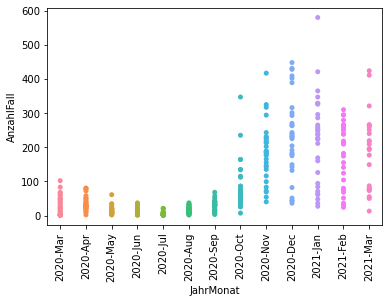

In [37]:
sns.stripplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_han,
             jitter=False)
plt.xticks(rotation=90);

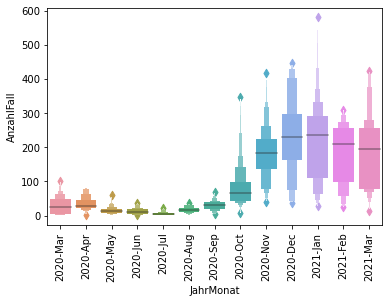

In [38]:
sns.boxenplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_han)
plt.xticks(rotation=90);

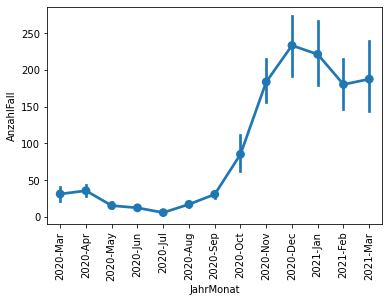

In [39]:
sns.pointplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_han)
plt.xticks(rotation=90);

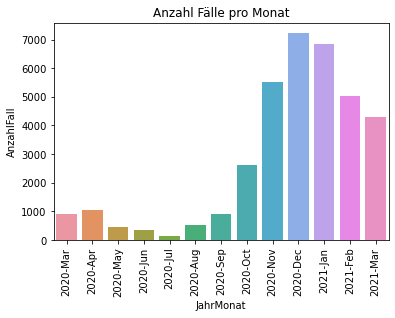

In [40]:
sns.barplot(x='JahrMonat', y='AnzahlFall', data=piv_reg_han,
           ci=None, estimator=sum)
plt.xticks(rotation=90)
plt.title('Anzahl Fälle pro Monat');

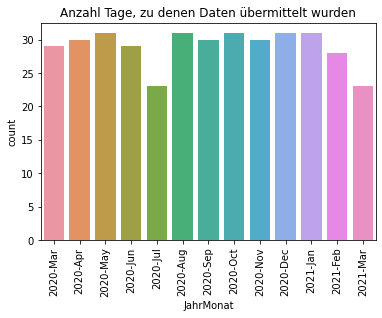

In [41]:
sns.countplot(x='JahrMonat', data=piv_reg_han)
plt.xticks(rotation=90)
plt.title('Anzahl Tage, zu denen Daten übermittelt wurden');